<a href="https://colab.research.google.com/github/shruteeegrg/Machine-Learning-with-Python/blob/main/Intro_to_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating a Neural Network**

Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot  as plt

###Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Training and Testing Dataset

Let's have a look at this data to see what we are working with

In [ ]:
train_images.shape

(60000, 28, 28)

Let's look at one pixel now. Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [ ]:
train_images[0,23,23]

194

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

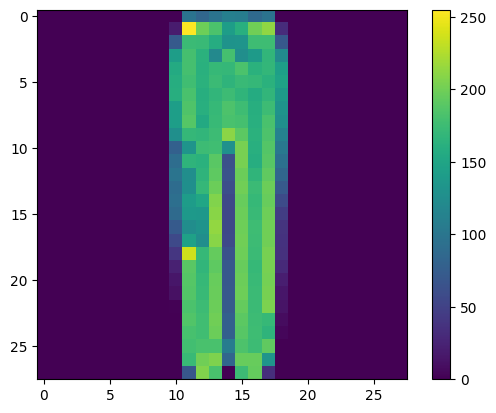

In [ ]:
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.



In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

###Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [ ]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7836 - loss: 0.6259
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8647 - loss: 0.3831
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8745 - loss: 0.3467
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8835 - loss: 0.3182
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8876 - loss: 0.2982
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8964 - loss: 0.2806
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9019 - loss: 0.2659
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9026 - loss: 0.2594
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9070 - loss: 0.2480
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9106 - loss: 0.2404


##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.3303
Test loss: 0.33177483081817627
Test accuracy: 0.8840000033378601


**Making Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Pullover


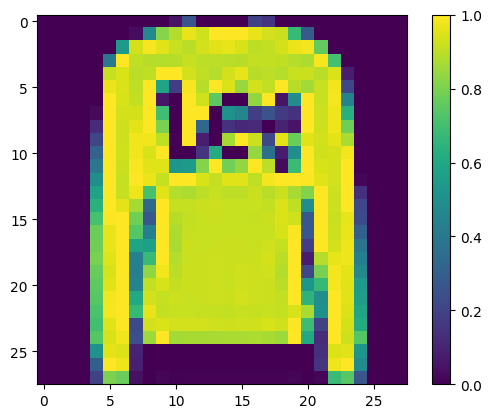

In [ ]:
predictions = model.predict(test_images) # array of all the prediction test labels for the corresponding test images
print(class_names[np.argmax(predictions[1])])

plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


Checking the prediction.

In [ ]:
class_names[test_labels[1]]

'Pullover'

**Verifiying Prediction**

Pick a number: 45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Text(0.5, 1.0, 'Excpected: Sneaker')
Text(0.5, 0, 'Guess: Sneaker')


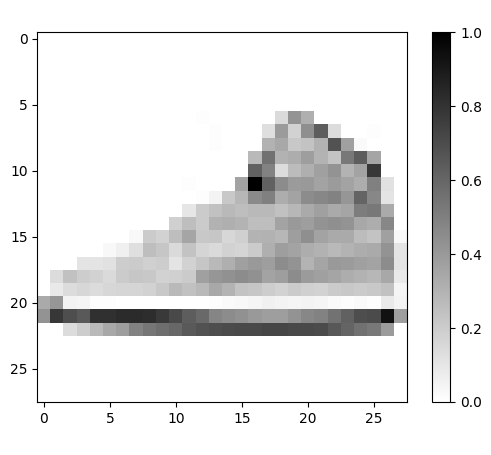

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  print(plt.title("Excpected: " + label))
  print(plt.xlabel("Guess: " + guess))
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
